### Exercise: Scrape `unegui.mn`
* Scrape apartment listings from `https://www.unegui.mn/l-hdlh/l-hdlh-zarna/oron-suuts-zarna/`
* Use only the first page
  * Get the `listing title` and `listing price`
  * Make a dataframe and make a histogram using `listing price`

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import requests
from bs4 import BeautifulSoup

In [2]:
# Your code here
response = requests.get("https://www.unegui.mn/l-hdlh/l-hdlh-zarna/oron-suuts-zarna/")

In [3]:
soup = BeautifulSoup(response.content)

#### Getting the titles

In [27]:
list_titles = soup.find_all("a", {"class":"announcement-block__title"})

In [28]:
list_titles[0].get_text().strip()

'River plaza-д 216мкв 5 өрөө'

In [29]:
list_titles = [x.get_text().strip() for x in list_titles]

#### Getting the prices

In [6]:
all_listings = soup.find_all("div", {"class": "announcement-block__price"})

In [15]:
all_listings[0].get_text(strip=True)

'1.65 Тэрбум₮'

#### Print out listing prices
*If it has a discount price, get only the latest price.*

Example: https://www.unegui.mn/adv/7705747_golden-park-102-r-bair-5-davkhart-1-oroo-bair-zarna/

* `get_text(strip=True)` to get the text inside of a `div`
* Use `split()` function to split your price and get only the number from the string
* Convert the price to float
* If your price is in **Тэрбум** multiply the price by billion
* If your price is in **сая** millions multiply the price by million

In [30]:
list_prices = []
for listing in all_listings:
    price_str = listing.get_text(strip=True)
    num_price = float(price_str.split(' ')[0])
    amount = price_str.split(' ')[1]
    # print("price is:", price_str)
    if "Тэрбум" in amount:
        num_price = num_price * 1_000_000_000
    else:
        num_price = num_price * 1_000_000
    print(num_price)
    list_prices += [num_price]

1650000000.0
165000000.0
2700000.0
3500000.0
250000000.0
4200000.0
2650000.0
79000000.0
327000000.0
6150000.0
560000000.0
3100000.0
292000000.0
95000000.0
250000000.0
210000000.0
219000000.0
4099999.9999999995
980000000.0
3600000.0
450000000.0
446110000.0
3800000.0
2800000.0
230000000.0
3300000.0
335000000.0
580000000.0
2700000.0
3000000.0
3150000.0
1140000000.0
175000000.0
679800000.0
2250000.0
140000000.0
2800000.0
280000000.0
1350000000.0
85000000.0
3400000.0
135000000.0
445000000.0
115000000.0
335000000.0
700000000.0
3250000.0
160000000.0
179000000.0
129900000.0
83000000.0
92000000.0
100000000.0
116500000.0
1500000000.0
2500000.0
520000000.0
450000000.0
165000000.0
338000000.0


In [33]:
df = pd.DataFrame({"title": list_titles, "price": list_prices})
df

,title,price
0,River plaza-д 216мкв 5 өрөө,1650000000.00
1,4-р хороололд хуучнаар од кино театрын урд зам...,165000000.00
2,Богд ар хороололд гал тогоо тусдаа 1 өрөө байр,2700000.00
3,King tower 5 өрөө байр,3500000.00
4,"Төмөр зам, 25 -ын kfc-н замын урд 4 өрөө орон ...",250000000.00
5,Energy luxury residence 4 өрөө 113.19m2,4200000.00
6,2 өрөө байр 51.36m2,2650000.00
7,Golden park-д 5 давхарт 31мкв 1 өрөө байр,79000000.00
8,Худ зайсангийн оргил худалдааны төвийн урд 4 ө...,327000000.00
9,Tokyo town 1 хотхонд 4 өрөө байр 110.56m2,6150000.00


<Axes: ylabel='Frequency'>

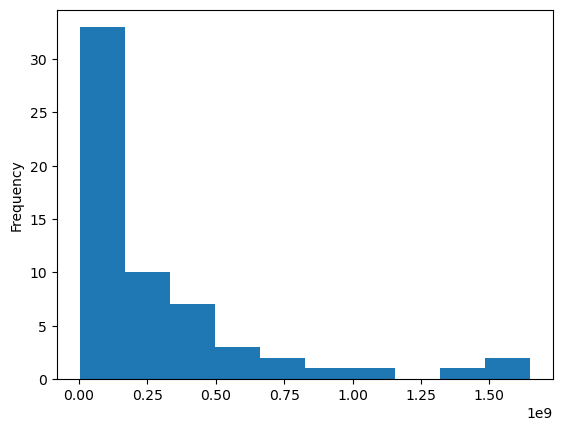

In [36]:
df['price'].plot.hist()